In [8]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.graph.message import add_messages
load_dotenv()

True

In [9]:
llm = ChatGroq(model="llama-3.1-8b-instant")

In [10]:
class JokeState(TypedDict):
    topic: str
    joke: str
    explanation: str

In [11]:
def generate_joke(state: JokeState):

    prompt = f'generate a joke on the topic {state["topic"]}'
    response = llm.invoke(prompt).content

    return {'joke': response}

In [12]:
def generate_explanation(state: JokeState):

    prompt = f'write an explanation for the joke - {state["joke"]}'
    response = llm.invoke(prompt).content

    return {'explanation': response}

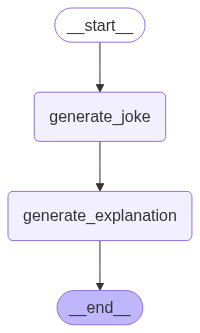

In [14]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)
workflow

In [15]:
config = {"configurable": {"thread_id": "1"}}

workflow.invoke({'topic': 'cats'}, config=config)

{'topic': 'cats',
 'joke': 'Why did the cat join a band? \n\nBecause it wanted to be the purr-cussionist.',
 'explanation': 'The joke is a play on words. The punchline "purr-cussionist" is a pun on the word "percussionist," which is a type of musician who plays percussion instruments, such as drums. However, "purr-cussionist" incorporates the sound a cat makes, a "purr," to create a cat-themed pun.\n\nThe joke requires a basic understanding of music and the role of a percussionist, as well as familiarity with cat sounds and behavior. The humor comes from the unexpected twist on the word "percussionist" and the clever way it incorporates the cat\'s purring sound, creating a clever and punny connection between the cat and its potential role in the band.'}

In [16]:
workflow.get_state(config)

StateSnapshot(values={'topic': 'cats', 'joke': 'Why did the cat join a band? \n\nBecause it wanted to be the purr-cussionist.', 'explanation': 'The joke is a play on words. The punchline "purr-cussionist" is a pun on the word "percussionist," which is a type of musician who plays percussion instruments, such as drums. However, "purr-cussionist" incorporates the sound a cat makes, a "purr," to create a cat-themed pun.\n\nThe joke requires a basic understanding of music and the role of a percussionist, as well as familiarity with cat sounds and behavior. The humor comes from the unexpected twist on the word "percussionist" and the clever way it incorporates the cat\'s purring sound, creating a clever and punny connection between the cat and its potential role in the band.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f074467-23ef-6cb5-8002-001f80c190e5'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at=

In [17]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'cats', 'joke': 'Why did the cat join a band? \n\nBecause it wanted to be the purr-cussionist.', 'explanation': 'The joke is a play on words. The punchline "purr-cussionist" is a pun on the word "percussionist," which is a type of musician who plays percussion instruments, such as drums. However, "purr-cussionist" incorporates the sound a cat makes, a "purr," to create a cat-themed pun.\n\nThe joke requires a basic understanding of music and the role of a percussionist, as well as familiarity with cat sounds and behavior. The humor comes from the unexpected twist on the word "percussionist" and the clever way it incorporates the cat\'s purring sound, creating a clever and punny connection between the cat and its potential role in the band.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f074467-23ef-6cb5-8002-001f80c190e5'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at

In [18]:
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic':'pasta'}, config=config2)

{'topic': 'pasta',
 'joke': 'Why did the spaghetti go to therapy? \n\nBecause it was feeling a little "twisted" and had a lot of "saucy" issues to work through.',
 'explanation': 'The joke is a play on words, using puns to create a humorous effect. Here\'s a breakdown of the explanation:\n\n- "Twisted" is a common phrase that can mean a person is feeling a bit confused, anxious, or upset. In this context, it\'s used to describe the spaghetti, which is literally twisted or tangled, referencing its curly shape. This double meaning creates a clever wordplay.\n\n- "Saucy" is a colloquial term used to describe someone or something that\'s a bit cheeky or flirtatious. However, in this joke, it\'s also a reference to the fact that spaghetti is typically served with a tomato-based sauce. This pun connects the word "saucy" to the food item, the spaghetti.\n\nBy combining these two puns, the joke creates a clever and unexpected connection between the setup ("spaghetti went to therapy") and the p

In [19]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the spaghetti go to therapy? \n\nBecause it was feeling a little "twisted" and had a lot of "saucy" issues to work through.', 'explanation': 'The joke is a play on words, using puns to create a humorous effect. Here\'s a breakdown of the explanation:\n\n- "Twisted" is a common phrase that can mean a person is feeling a bit confused, anxious, or upset. In this context, it\'s used to describe the spaghetti, which is literally twisted or tangled, referencing its curly shape. This double meaning creates a clever wordplay.\n\n- "Saucy" is a colloquial term used to describe someone or something that\'s a bit cheeky or flirtatious. However, in this joke, it\'s also a reference to the fact that spaghetti is typically served with a tomato-based sauce. This pun connects the word "saucy" to the food item, the spaghetti.\n\nBy combining these two puns, the joke creates a clever and unexpected connection between the setup ("spaghetti went to 

In [21]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the spaghetti go to therapy? \n\nBecause it was feeling a little "twisted" and had a lot of "saucy" issues to work through.', 'explanation': 'The joke is a play on words, using puns to create a humorous effect. Here\'s a breakdown of the explanation:\n\n- "Twisted" is a common phrase that can mean a person is feeling a bit confused, anxious, or upset. In this context, it\'s used to describe the spaghetti, which is literally twisted or tangled, referencing its curly shape. This double meaning creates a clever wordplay.\n\n- "Saucy" is a colloquial term used to describe someone or something that\'s a bit cheeky or flirtatious. However, in this joke, it\'s also a reference to the fact that spaghetti is typically served with a tomato-based sauce. This pun connects the word "saucy" to the food item, the spaghetti.\n\nBy combining these two puns, the joke creates a clever and unexpected connection between the setup ("spaghetti went to